In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import seaborn as sn
sn.set(style='whitegrid')

In [58]:
#simulating the data
k = 100;
feature_count = 10; 
class_count = 3

total_feature_count = 10;
p1_feature_count = 3; 
p2_feature_count = total_feature_count - p1_feature_count;

variance = 2;

class_array = np.random.randint(class_count, size=k);

covariance = variance*np.ones(k)
mean = np.zeros(p2_feature_count,)

In [59]:

size_random = (k,1)

rand_array = np.zeros((k, p2_feature_count));

for i in range(len(mean)):
    mean_sub = mean[i];
    small_arry = np.random.normal(loc=mean_sub, scale=np.sqrt(variance), size=size_random)
    rand_array[:,i] = small_arry.reshape(k,)

In [60]:
#randomly creating samples
feature_df = pd.get_dummies(class_array)

In [61]:
feature_df

,0,1,2
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,0
4,0,1,0
...,...,...,...
95,0,0,1
96,1,0,0
97,0,1,0
98,0,0,1


In [62]:
random_df = pd.DataFrame(rand_array)
random_df

,0,1,2,3,4,5,6
0,0.082418,-0.442934,0.106569,0.267288,-0.886695,0.732408,-0.972116
1,2.257264,0.515584,0.021800,0.736013,1.026292,0.907172,-3.899011
2,0.122929,-2.347784,3.647077,-0.737771,-0.653395,1.020622,-2.740920
3,0.083148,-0.096931,0.380690,-0.099753,1.289424,0.759575,-2.950420
4,0.553642,2.524527,0.081399,0.336847,0.259980,-0.183818,0.415178
...,...,...,...,...,...,...,...
95,1.579180,1.728819,-2.102017,0.425070,0.832215,1.139172,-0.213899
96,-0.807288,1.962499,-1.373740,0.492752,0.790020,0.652358,-0.961520
97,-0.759019,1.425362,1.184170,1.159831,-2.548507,-2.105418,1.305250
98,-0.118265,0.784825,2.163962,-0.307318,1.091186,-0.708016,-0.106014


In [63]:
#checking the generated data 
final_df = pd.concat([feature_df, random_df], axis=1)
final_df['class'] = class_array

In [64]:
final_df

,0,1,2,0,1,2,3,4,5,6,class
0,0,0,1,0.082418,-0.442934,0.106569,0.267288,-0.886695,0.732408,-0.972116,2
1,0,0,1,2.257264,0.515584,0.021800,0.736013,1.026292,0.907172,-3.899011,2
2,0,0,1,0.122929,-2.347784,3.647077,-0.737771,-0.653395,1.020622,-2.740920,2
3,1,0,0,0.083148,-0.096931,0.380690,-0.099753,1.289424,0.759575,-2.950420,0
4,0,1,0,0.553642,2.524527,0.081399,0.336847,0.259980,-0.183818,0.415178,1
...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,1,1.579180,1.728819,-2.102017,0.425070,0.832215,1.139172,-0.213899,2
96,1,0,0,-0.807288,1.962499,-1.373740,0.492752,0.790020,0.652358,-0.961520,0
97,0,1,0,-0.759019,1.425362,1.184170,1.159831,-2.548507,-2.105418,1.305250,1
98,0,0,1,-0.118265,0.784825,2.163962,-0.307318,1.091186,-0.708016,-0.106014,2


In [65]:
final_df['class'].unique()


array([2, 0, 1])

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [77]:
#removing duplicate features - random features might have duplicate or repeated features
train_features, test_features, train_labels, test_labels = train_test_split(final_df.drop(final_df.columns[[3,4,5,6,7,8,9,10 ]], axis=1),
    final_df['class'],
    test_size=0.2,
    random_state=41)

In [78]:
train_features_T = train_features.T
train_features_T.shape

(0, 80)

In [79]:
print(train_features_T.duplicated().sum())

0


In [80]:
unique_features = train_features_T.drop_duplicates(keep='first').T

In [81]:
unique_features.shape

(80, 0)

In [82]:
duplicated_features = [dup_col for dup_col in train_features.columns if dup_col not in unique_features.columns]
duplicated_features

[]

In [85]:
#removing correlated features
num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(final_df.select_dtypes(include=num_colums).columns)
final_df = final_df[numerical_columns]

In [86]:
final_df.shape

(100, 11)

In [108]:
train_features, test_features, train_labels, test_labels = train_test_split(
    final_df.drop(final_df.columns[[3,4,5,6,7,8,9,10]], axis=1),
    final_df['class'],
    test_size=0.2,
    random_state=41)

In [109]:
correlated_features = set()
correlation_matrix = final_df.corr()

In [110]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [111]:
len(correlated_features)

1

In [112]:
print(correlated_features)

{'class'}


In [ ]:
#as the class feature is important for the classification of classes. not removing it.

In [92]:
final_df.isnull().sum()

0        0
0        0
1        0
1        0
2        0
2        0
3        0
4        0
5        0
6        0
class    0
dtype: int64

KeyError: '0'

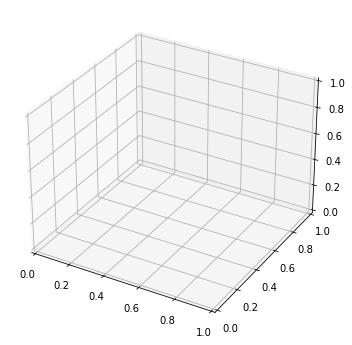

In [93]:
X = final_df.iloc[:,1:]
Y = final_df['class']
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X['0'], X['1'], X['2'], c = Y, marker = '.', s=100)
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')
plt.show()

In [ ]:
X = final_df[['width', 'height', 'color_score']]
Y = final_df['fruit_label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
X_train.head()

In [ ]:
X_train.shape

In [ ]:
Y_train.shape

In [ ]:
X_test

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
knn.fit(X_train, Y_train)

In [ ]:
## Use the trained KNN classifier to classify a sample in  the testing set
sample_test = X_test.iloc[0,:]
sample_test

In [ ]:
label_true = Y_test.iloc[0]
print('The true label is', label_true, ':', fruit_lable_to_name[label_true])

In [ ]:
label_predicted = knn.predict([sample_test])
print('The label predicted by knn is', label_predicted[0], ':', fruit_lable_to_name[label_predicted[0]])
if label_predicted[0] == label_true:
    print('Classification is accurate for this testing sample')
else:
    print('Classification is wrong for this testing sample')

In [ ]:
# Use the trained k-NN classifier to classify a sample that is not in the training set nor the testing set
sample_new = [6.0, 4.0, 0.8]
label_predicted = knn.predict([sample_new])
print('The label predicted by knn is', label_predicted[0], ':', fruit_lable_to_name[label_predicted[0]])

In [ ]:
# Evaluate Performance of the KNN Classifier on the Training Set and the Testing Set
knn.score(X_train, Y_train)

In [ ]:

knn.score(X_test, Y_test)

In [ ]:
#using another method to obtain accuracy
Y_train_pred = knn.predict(X_train)
accuracy_score(Y_train, Y_train_pred)

In [ ]:
Y_test_pred = knn.predict(X_test)
accuracy_score(Y_test, Y_test_pred)

In [ ]:
cm = confusion_matrix(Y_test, Y_test_pred)
df_cm = pd.DataFrame(cm, index = ['apple', 'mandarin', 'orange', 'lemon'],
                     columns = ['apple', 'mandarin', 'orange', 'lemon'])
plt.figure(figsize = (6,6))
sn.set(font_scale=1.6)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 20}, square=True)

In [ ]:
#normalize the confusion matrix
df_cm = pd.DataFrame(cm/Y_test.shape[0], index = ['apple', 'mandarin', 'orange', 'lemon'],
                     columns = ['apple', 'mandarin', 'orange', 'lemon'])
plt.figure(figsize = (6,6))
sn.set(font_scale=1.6)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 20}, square=True)

In this case we can see how the mean value of the accurracy increases with a bigger split of the training set.

In [ ]:
for i in np.arange(1, 101):

    KNN = KNeighborsClassifier(n_neighbors = i)
    neigh = np.arange(1,21)
    train_accuracy =np.empty(len(neigh))
    test_accuracy = np.empty(len(neigh))


for i,k in enumerate(neigh):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

    new_predictions = knn.predict(X_test)
    error_rates = []
    error_rates.append(np.mean(new_predictions != y_test))

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neigh, test_accuracy, label='Testing Accuracy')
plt.plot(neigh, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
plt.plot(error_rates)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

In [ ]:
y_pred = neigh.predict(X_test)
y_pred

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

##### Performing Feature normalization: scaling the feature in the range of 0 to 1

In [ ]:
X = fruits[['WdH', 'color_score']]
Y = fruits['fruit_label']
#random split with a fixed percent for testing: 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)           
# build a minmax transformer
scaler = MinMaxScaler()
# Fit to data, then transform it.
X_train = scaler.fit_transform(X_train)
# we must apply the same scaling to the test set
X_test = scaler.transform(X_test)
# build a KNN classifier    
knn = KNeighborsClassifier(n_neighbors = 5)
# train the KNN classifier
knn.fit(X_train, Y_train)
# test the KNN classifier
acc_train=knn.score(X_train, Y_train)
acc_test=knn.score(X_test, Y_test)    
print('training accuracy=', acc_train)
print('testing accuracy=',  acc_test)

In [ ]:
X = fruits[['width', 'height', 'color_score']]
Y = fruits['fruit_label']
#random split with a fixed percent for testing: 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# build a minmax transformer
scaler = MinMaxScaler()
# Fit to data, then transform it.
X_train = scaler.fit_transform(X_train)
# we must apply the same scaling to the test set
X_test = scaler.transform(X_test)
# build a KNN classifier    
knn = KNeighborsClassifier(n_neighbors = 5)
# train the KNN classifier
knn.fit(X_train, Y_train)
# test the KNN classifier
acc_train=knn.score(X_train, Y_train)
acc_test=knn.score(X_test, Y_test)    
print('training accuracy=', acc_train)
print('testing accuracy=',  acc_test)

##### Ploting decision boundaries to visualize the classification result

In [ ]:
X = fruits[['WdH', 'color_score']]
Y = fruits['fruit_label']
#random split with a fixed percent for testing: 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)    
# Fit to data, then transform it.
X_train = scaler.fit_transform(X_train)
# we must apply the same scaling to the test set
X_test = scaler.transform(X_test)
# build a KNN classifier    
knn = KNeighborsClassifier(n_neighbors = 5)
# train the KNN classifier
knn.fit(X_train, Y_train)
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X['WdH'].min() - .5, X['WdH'].max() + .5
y_min, y_max = 0, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xx_r=xx.reshape(xx.shape[0]*xx.shape[1],1)
yy_r=yy.reshape(yy.shape[0]*yy.shape[1],1)
xx_yy = np.concatenate([xx_r, yy_r], axis=1)
xx_yy = scaler.transform(xx_yy)
Z = knn.predict(xx_yy)
Z = Z.reshape(xx.shape)
# Put the result into a color plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.pcolormesh(xx, yy, Z,cmap='viridis')
sc=ax.scatter(X['WdH'], X['color_score'],c=Y,cmap='viridis', 
              marker='o',edgecolor = 'black', s=30)
ax.set_xlabel('width/height')
ax.set_ylabel('color_score')
ax.set_aspect('equal')
cbar = fig.colorbar(sc, cmap='viridis', ticks=[1, 2, 3, 4])
cbar.ax.set_yticklabels(['apple', 'mandarin', 'orange', 'lemon'])

Classification report

In [ ]:
#printing out the classification report which is one of the features in Scikit-learn

In [ ]:
print(classification_report(Y_test,Y_test_pred))

#Performing cross-validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,Y)

In [ ]:
knn_cv.best_score_

In [ ]:
knn_cv.best_params_